In [1]:
import requests
import pandas as pd
import numpy as np
import findspark
import pandas as pd
import numpy as np
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import*
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType, DoubleType
from pyspark import SparkContext
from pyspark.sql.functions import monotonically_increasing_id
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession.builder.appName("Top_three_months_transactions").getOrCreate()

In [3]:
query= "(SELECT COUNT(transaction_id), MONTH FROM cdw_sapp_credit_card GROUP BY MONTH \
         ORDER BY COUNT(transaction_id) DESC LIMIT 3) as top_three"

sdf_top = spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                     user="root",\
                                     password="password",\
                                     url="jdbc:mysql://localhost:3306/capstone_project",\
                                     dbtable=query).load()

sdf_top.show()

+---------------------+-----+
|COUNT(transaction_id)|MONTH|
+---------------------+-----+
|                 3959|    2|
|                 3946|   10|
|                 3946|    5|
+---------------------+-----+



In [4]:
#Convert spark dataframe to pandas dataframe
pdf_top = sdf_top.toPandas()
pdf_top.set_index('MONTH', inplace = True)

pdf_top

,COUNT(transaction_id)
MONTH,
2,3959
10,3946
5,3946


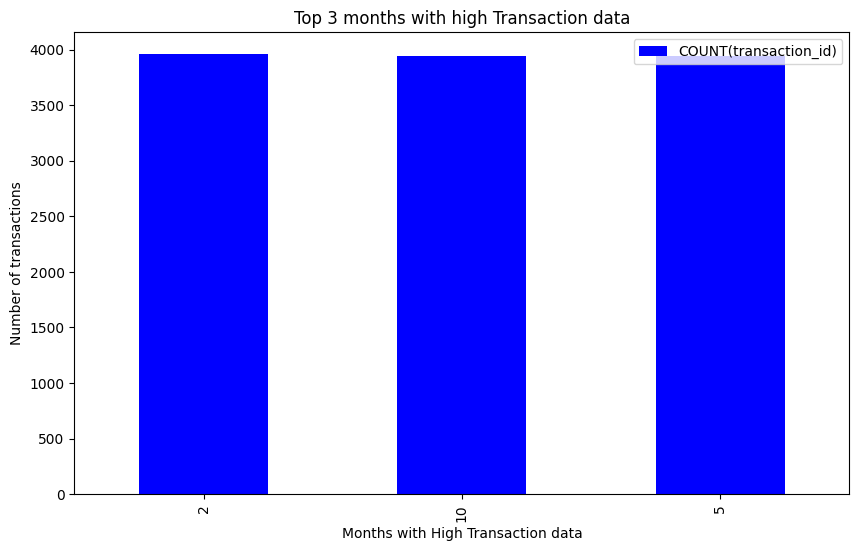

In [5]:
pdf_top.plot(kind='bar', figsize=(10, 6), color = 'blue')
plt.xlabel('Months with High Transaction data')
plt.ylabel('Number of transactions')
plt.title('Top 3 months with high Transaction data')
plt.show()

In [6]:
spark.stop()